# Methylation

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

Mounted at /content/drive


In [2]:
import os
os.listdir("/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025")

['RNA_Seq_transcriptom_meta_data.csv',
 'mirna_data.csv',
 'mirna_meta.csv',
 'methylation_data.csv',
 'methylation_data_meta.csv',
 'rna_seq_meta.csv',
 'rna_seq_expr.csv',
 'proteomics_data_meta.csv',
 'proteomics_data.csv',
 'processed_data',
 'proteom_processed_data.csv',
 'methylation_processed_data.csv']

In [3]:
meth = "/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/methylation_data.csv"
meth_meta = "/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/methylation_data_meta.csv"

In [17]:
meth_df = pd.read_csv(meth)
meth_meta_df = pd.read_csv(meth_meta)

In [18]:
meth_df.shape, meth_meta_df.shape

((119853, 476), (475, 31))

In [19]:
meth_df.head()

,Unnamed: 0,TCGA-D3-A1Q5-06A-11D-A19B-05,TCGA-EE-A2GU-06A-11D-A19B-05,TCGA-EE-A29X-06A-11D-A19B-05,TCGA-EB-A1NK-01A-11D-A19B-05,TCGA-GF-A2C7-01A-11D-A19C-05,TCGA-FR-A8YD-06A-11D-A373-05,TCGA-D3-A2JL-06A-11D-A19B-05,TCGA-EE-A3JI-06A-11D-A21B-05,TCGA-FS-A1ZE-06A-11D-A19C-05,...,TCGA-EE-A3AC-06A-11D-A19B-05,TCGA-D3-A1QB-06A-11D-A19D-05,TCGA-EB-A550-01A-61D-A27L-05,TCGA-D9-A6EG-06A-12D-A32S-05,TCGA-EB-A44O-01A-11D-A25S-05,TCGA-RP-A690-06A-11D-A30Z-05,TCGA-EE-A29H-06A-12D-A19C-05,TCGA-EB-A44Q-06A-11D-A25S-05,TCGA-EB-A3XE-01A-12D-A23D-05,TCGA-ER-A19T-06A-11D-A19D-05
0,cg16619049,0.051550,0.413800,0.685133,0.280455,0.111672,0.277309,0.382790,0.891458,0.043956,...,0.324192,0.385325,0.351065,0.112432,0.196277,0.244896,0.278559,0.341959,0.341881,0.551034
1,cg18147296,0.706144,0.826661,0.658807,0.472715,0.415556,0.766575,0.509625,0.794910,0.813884,...,0.522931,0.735372,0.617894,0.849584,0.730269,0.923431,0.426500,0.699907,0.737956,0.648348
2,cg13938959,0.718709,0.801524,0.563237,0.404367,0.916525,0.835401,0.381386,0.829706,0.367208,...,0.339329,0.659876,0.334356,0.917213,0.238067,0.916314,0.348700,0.395418,0.555460,0.836201
3,cg12445832,0.406887,0.655307,0.349309,0.231782,0.816928,0.736616,0.257500,0.687068,0.101962,...,0.177142,0.341468,0.264174,0.873994,0.113819,0.881807,0.218245,0.297156,0.392432,0.723447
4,cg23999112,0.691858,0.887773,0.753252,0.488698,0.903782,0.842471,0.589585,0.884971,0.495358,...,0.327269,0.705845,0.566170,0.918790,0.261518,0.883046,0.364017,0.562528,0.600259,0.902022


In [20]:
df_meth = meth_df.set_index("Unnamed: 0")

In [21]:
df_meth.shape

(119853, 475)

In [22]:
df_meth = df_meth.T
df_meth.shape

(475, 119853)

In [23]:
df_meth.shape

(475, 119853)

## Add Sample type in the meth dataframe

In [24]:
meth_meta_df["sample_type"]

,sample_type
0,Metastatic
1,Metastatic
2,Metastatic
3,Primary Tumor
4,Primary Tumor
...,...
470,Metastatic
471,Metastatic
472,Metastatic
473,Primary Tumor


In [25]:
meth_meta_df["sample_type"].shape

(475,)

In [28]:
type(meth_meta_df["sample_type"].to_numpy())

numpy.ndarray

In [29]:
df_meth["Sample_type"] = meth_meta_df["sample_type"].to_numpy()
df_meth.shape

(475, 119854)

In [31]:
df_meth.head()

Unnamed: 0,cg16619049,cg18147296,cg13938959,cg12445832,cg23999112,cg08128007,cg01097950,cg04364728,cg05151709,cg08546707,...,cg00618396,cg24194941,cg23214992,cg09231482,cg00547789,cg10512285,cg26540943,cg01747155,cg09975171,Sample_type
TCGA-D3-A1Q5-06A-11D-A19B-05,0.051550,0.706144,0.718709,0.406887,0.691858,0.524282,0.639921,0.108183,0.233207,0.251609,...,0.044096,0.067361,0.020633,0.070259,0.039242,0.052455,0.012953,0.026067,0.046371,Metastatic
TCGA-EE-A2GU-06A-11D-A19B-05,0.413800,0.826661,0.801524,0.655307,0.887773,0.502059,0.784425,0.625759,0.671773,0.783711,...,0.351339,0.410216,0.411519,0.631697,0.629846,0.483779,0.262030,0.370279,0.391581,Metastatic
TCGA-EE-A29X-06A-11D-A19B-05,0.685133,0.658807,0.563237,0.349309,0.753252,0.715716,0.709655,0.599074,0.571000,0.623474,...,0.258904,0.450405,0.324125,0.450962,0.434083,0.363803,0.378473,0.262183,0.301864,Metastatic
TCGA-EB-A1NK-01A-11D-A19B-05,0.280455,0.472715,0.404367,0.231782,0.488698,0.547806,0.549192,0.268345,0.383252,0.438138,...,0.044379,0.053461,0.022440,0.119818,0.038200,0.063055,0.014549,0.023815,0.117956,Primary Tumor
TCGA-GF-A2C7-01A-11D-A19C-05,0.111672,0.415556,0.916525,0.816928,0.903782,0.443097,0.861504,0.738397,0.809348,0.871783,...,0.051562,0.051040,0.018280,0.331167,0.130455,0.096430,0.012192,0.027983,0.197631,Primary Tumor


## Subset Methylatoin Dataset

Select only
* Metastatic
* Primary Tumor

In [43]:
df_meth["Sample_type"].value_counts()

,count
Sample_type,
Metastatic,368
Primary Tumor,104
Solid Tissue Normal,2
Additional Metastatic,1


In [47]:
df_meth2 = df_meth[df_meth['Sample_type'].isin(['Metastatic', 'Primary Tumor'])]
df_meth2.shape
# idx

(472, 119854)

### Label Encoding

In [49]:
labels = {
    "Metastatic": 1,
    "Primary Tumor": 0
}
df_meth2["Sample_type"] = df_meth2["Sample_type"].map(labels)
df_meth2.head()

<ipython-input-49-4b34317768a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meth2["Sample_type"] = df_meth2["Sample_type"].map(labels)


Unnamed: 0,cg16619049,cg18147296,cg13938959,cg12445832,cg23999112,cg08128007,cg01097950,cg04364728,cg05151709,cg08546707,...,cg00618396,cg24194941,cg23214992,cg09231482,cg00547789,cg10512285,cg26540943,cg01747155,cg09975171,Sample_type
TCGA-D3-A1Q5-06A-11D-A19B-05,0.051550,0.706144,0.718709,0.406887,0.691858,0.524282,0.639921,0.108183,0.233207,0.251609,...,0.044096,0.067361,0.020633,0.070259,0.039242,0.052455,0.012953,0.026067,0.046371,1
TCGA-EE-A2GU-06A-11D-A19B-05,0.413800,0.826661,0.801524,0.655307,0.887773,0.502059,0.784425,0.625759,0.671773,0.783711,...,0.351339,0.410216,0.411519,0.631697,0.629846,0.483779,0.262030,0.370279,0.391581,1
TCGA-EE-A29X-06A-11D-A19B-05,0.685133,0.658807,0.563237,0.349309,0.753252,0.715716,0.709655,0.599074,0.571000,0.623474,...,0.258904,0.450405,0.324125,0.450962,0.434083,0.363803,0.378473,0.262183,0.301864,1
TCGA-EB-A1NK-01A-11D-A19B-05,0.280455,0.472715,0.404367,0.231782,0.488698,0.547806,0.549192,0.268345,0.383252,0.438138,...,0.044379,0.053461,0.022440,0.119818,0.038200,0.063055,0.014549,0.023815,0.117956,0
TCGA-GF-A2C7-01A-11D-A19C-05,0.111672,0.415556,0.916525,0.816928,0.903782,0.443097,0.861504,0.738397,0.809348,0.871783,...,0.051562,0.051040,0.018280,0.331167,0.130455,0.096430,0.012192,0.027983,0.197631,0


### Seperate X and Y

In [50]:
X= df_meth2.drop("Sample_type", axis = 1)
y = df_meth2["Sample_type"]
y.head()

,Sample_type
TCGA-D3-A1Q5-06A-11D-A19B-05,1
TCGA-EE-A2GU-06A-11D-A19B-05,1
TCGA-EE-A29X-06A-11D-A19B-05,1
TCGA-EB-A1NK-01A-11D-A19B-05,0
TCGA-GF-A2C7-01A-11D-A19C-05,0


### Plot NaNs

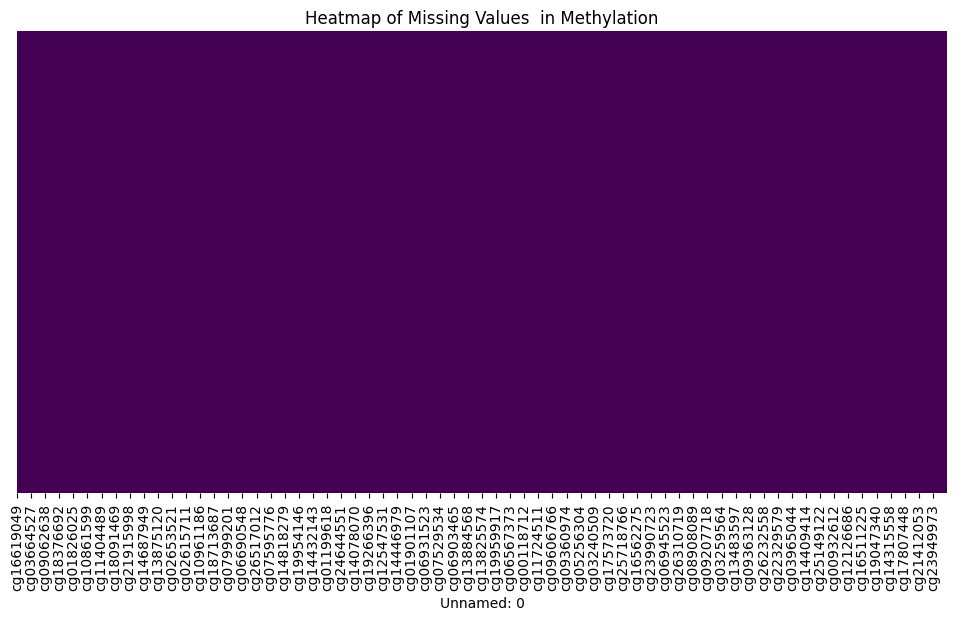

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of NaN values
plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(df_meth.isna(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Heatmap of Missing Values  in Methylation")
plt.show()


In [52]:
df_meth.isna().sum().sum()

0

# AutoEncoder

In [53]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torch.optim as optim

In [54]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [55]:
X_norm[:5], y[:5]

(array([[0.02519482, 0.72326999, 0.71949467, ..., 0.00664454, 0.01136981,
         0.01144273],
        [0.4062298 , 0.87675703, 0.82069435, ..., 0.38672459, 0.49979979,
         0.43118575],
        [0.69163367, 0.66298311, 0.52950745, ..., 0.56441138, 0.34641414,
         0.32209805],
        [0.26597009, 0.42598257, 0.33536918, ..., 0.00907861, 0.00817473,
         0.09848373],
        [0.08843517, 0.35318671, 0.96122619, ..., 0.00548223, 0.01408989,
         0.19536049]]),
 TCGA-D3-A1Q5-06A-11D-A19B-05    1
 TCGA-EE-A2GU-06A-11D-A19B-05    1
 TCGA-EE-A29X-06A-11D-A19B-05    1
 TCGA-EB-A1NK-01A-11D-A19B-05    0
 TCGA-GF-A2C7-01A-11D-A19C-05    0
 Name: Sample_type, dtype: int64)

In [56]:
X_tensor = torch.FloatTensor(X_norm)
y_tensor = torch.LongTensor(y.to_numpy())

In [58]:
# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [59]:
# --------------------------
# 2. Autoencoder for Feature Selection
# --------------------------
"""
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed, latent
"""
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),  # Normalize activations
            nn.Dropout(0.3),  # Drop 30% of activations

            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),  # Drop 20% of activations

            nn.Linear(256, latent_dim),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),

            nn.Linear(256, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),

            nn.Linear(512, input_dim),
            nn.Sigmoid()  # Use Sigmoid if input features are normalized (e.g., [0,1])
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed, latent


In [66]:
# Hyperparameters
input_dim = X_tensor.shape[1]
latent_dim = 1000 # Bottleneck layer (selected features)
lr = 0.01
epochs = 10

# Initialize model, loss, optimizer
autoencoder = Autoencoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=lr)

In [67]:
autoencoder

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=119853, out_features=512, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=256, out_features=1000, bias=True)
    (9): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=1000, out_features=256, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=512, out_features=119853, bias=True)
    (7): Sigmoid()
  )
)

In [68]:
# Train Autoencoder
autoencoder.train()
for epoch in range(epochs):
    for batch_X, _ in train_loader:  # Unsupervised (no labels needed)
        optimizer.zero_grad()
        reconstructed, latent = autoencoder(batch_X)
        loss = criterion(reconstructed, batch_X)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.0671
Epoch [2/10], Loss: 0.0527
Epoch [3/10], Loss: 0.0421
Epoch [4/10], Loss: 0.0375
Epoch [5/10], Loss: 0.0408
Epoch [6/10], Loss: 0.0385
Epoch [7/10], Loss: 0.0326
Epoch [8/10], Loss: 0.0367
Epoch [9/10], Loss: 0.0385
Epoch [10/10], Loss: 0.0325


In [70]:
# Extract latent features (selected features)
autoencoder.eval()
with torch.no_grad():
    X_latent = autoencoder.encoder(X_tensor)
    # X_test_latent = autoencoder.encoder(X_test_tensor)

In [71]:
X_latent.shape #, X_test_latent.shape

torch.Size([472, 1000])

In [72]:
df4 = pd.DataFrame(X_latent)
df4["Sample_type"] = y_tensor
df4.shape

(472, 1001)

In [73]:
df4.to_csv("/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/methylation_processed_data.csv", index = False)

# miRNA

In [64]:
mirna_file = "/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/mirna_data.csv"
mirna_file_meta = "/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/mirna_meta.csv"
df_mirna = pd.read_csv(mirna_file)
df_mirna_meta = pd.read_csv(mirna_file_meta)

In [65]:
df_mirna.head()

,Unnamed: 0,miRNA_ID,read_count_TCGA-D3-A1Q5-06A-11R-A18W-13,reads_per_million_miRNA_mapped_TCGA-D3-A1Q5-06A-11R-A18W-13,cross-mapped_TCGA-D3-A1Q5-06A-11R-A18W-13,read_count_TCGA-EE-A2GU-06A-11R-A18W-13,reads_per_million_miRNA_mapped_TCGA-EE-A2GU-06A-11R-A18W-13,cross-mapped_TCGA-EE-A2GU-06A-11R-A18W-13,read_count_TCGA-EE-A29X-06A-11R-A18W-13,reads_per_million_miRNA_mapped_TCGA-EE-A29X-06A-11R-A18W-13,...,cross-mapped_TCGA-EB-A44Q-06A-11R-A25Z-13,read_count_TCGA-EB-A3XE-01A-12R-A23A-13,reads_per_million_miRNA_mapped_TCGA-EB-A3XE-01A-12R-A23A-13,cross-mapped_TCGA-EB-A3XE-01A-12R-A23A-13,read_count_TCGA-FR-A69P-06A-21R-A310-13,reads_per_million_miRNA_mapped_TCGA-FR-A69P-06A-21R-A310-13,cross-mapped_TCGA-FR-A69P-06A-21R-A310-13,read_count_TCGA-ER-A19T-01A-11R-A18W-13,reads_per_million_miRNA_mapped_TCGA-ER-A19T-01A-11R-A18W-13,cross-mapped_TCGA-ER-A19T-01A-11R-A18W-13
0,1,hsa-let-7a-1,77785,7732.062009,N,36504,16494.547229,N,51082,20022.090855,...,N,100783,14543.670914,N,21301,9854.238141,N,121704,17563.116186,N
1,2,hsa-let-7a-2,78508,7803.930375,N,36801,16628.748427,N,50872,19939.779295,...,N,100920,14563.440943,Y,21085,9754.312530,N,120917,17449.544139,N
2,3,hsa-let-7a-3,79297,7882.359338,N,36671,16570.007162,N,51542,20202.392366,...,N,101491,14645.840119,N,21354,9878.756925,N,121308,17505.969387,N
3,4,hsa-let-7b,108740,10809.081736,N,21122,9544.100005,N,56550,22165.327079,...,N,142802,20607.297796,N,22773,10535.212675,N,72013,10392.203099,N
4,5,hsa-let-7c,32608,3241.332879,N,171,77.267356,N,1219,477.799005,...,N,7502,1082.589516,Y,3620,1674.679220,N,10295,1485.672461,N


In [68]:
df_mirna2 = df_mirna.set_index("miRNA_ID")
df_mirna2.head()

,Unnamed: 0,read_count_TCGA-D3-A1Q5-06A-11R-A18W-13,reads_per_million_miRNA_mapped_TCGA-D3-A1Q5-06A-11R-A18W-13,cross-mapped_TCGA-D3-A1Q5-06A-11R-A18W-13,read_count_TCGA-EE-A2GU-06A-11R-A18W-13,reads_per_million_miRNA_mapped_TCGA-EE-A2GU-06A-11R-A18W-13,cross-mapped_TCGA-EE-A2GU-06A-11R-A18W-13,read_count_TCGA-EE-A29X-06A-11R-A18W-13,reads_per_million_miRNA_mapped_TCGA-EE-A29X-06A-11R-A18W-13,cross-mapped_TCGA-EE-A29X-06A-11R-A18W-13,...,cross-mapped_TCGA-EB-A44Q-06A-11R-A25Z-13,read_count_TCGA-EB-A3XE-01A-12R-A23A-13,reads_per_million_miRNA_mapped_TCGA-EB-A3XE-01A-12R-A23A-13,cross-mapped_TCGA-EB-A3XE-01A-12R-A23A-13,read_count_TCGA-FR-A69P-06A-21R-A310-13,reads_per_million_miRNA_mapped_TCGA-FR-A69P-06A-21R-A310-13,cross-mapped_TCGA-FR-A69P-06A-21R-A310-13,read_count_TCGA-ER-A19T-01A-11R-A18W-13,reads_per_million_miRNA_mapped_TCGA-ER-A19T-01A-11R-A18W-13,cross-mapped_TCGA-ER-A19T-01A-11R-A18W-13
miRNA_ID,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a-1,1,77785,7732.062009,N,36504,16494.547229,N,51082,20022.090855,N,...,N,100783,14543.670914,N,21301,9854.238141,N,121704,17563.116186,N
hsa-let-7a-2,2,78508,7803.930375,N,36801,16628.748427,N,50872,19939.779295,N,...,N,100920,14563.440943,Y,21085,9754.312530,N,120917,17449.544139,N
hsa-let-7a-3,3,79297,7882.359338,N,36671,16570.007162,N,51542,20202.392366,N,...,N,101491,14645.840119,N,21354,9878.756925,N,121308,17505.969387,N
hsa-let-7b,4,108740,10809.081736,N,21122,9544.100005,N,56550,22165.327079,N,...,N,142802,20607.297796,N,22773,10535.212675,N,72013,10392.203099,N
hsa-let-7c,5,32608,3241.332879,N,171,77.267356,N,1219,477.799005,N,...,N,7502,1082.589516,Y,3620,1674.679220,N,10295,1485.672461,N


In [70]:
df_mirna2.shape

(1881, 1357)

In [72]:
count = 0
for col in df_mirna2.columns:
  print(f"Variable type: of column: {col} : {df_mirna2[col].dtype}")
  count += 1
  if count % 20 == 0:
    break

Variable type: of column: Unnamed: 0 : int64
Variable type: of column: read_count_TCGA-D3-A1Q5-06A-11R-A18W-13 : int64
Variable type: of column: reads_per_million_miRNA_mapped_TCGA-D3-A1Q5-06A-11R-A18W-13 : float64
Variable type: of column: cross-mapped_TCGA-D3-A1Q5-06A-11R-A18W-13 : object
Variable type: of column: read_count_TCGA-EE-A2GU-06A-11R-A18W-13 : int64
Variable type: of column: reads_per_million_miRNA_mapped_TCGA-EE-A2GU-06A-11R-A18W-13 : float64
Variable type: of column: cross-mapped_TCGA-EE-A2GU-06A-11R-A18W-13 : object
Variable type: of column: read_count_TCGA-EE-A29X-06A-11R-A18W-13 : int64
Variable type: of column: reads_per_million_miRNA_mapped_TCGA-EE-A29X-06A-11R-A18W-13 : float64
Variable type: of column: cross-mapped_TCGA-EE-A29X-06A-11R-A18W-13 : object
Variable type: of column: read_count_TCGA-EB-A1NK-01A-11R-A18W-13 : int64
Variable type: of column: reads_per_million_miRNA_mapped_TCGA-EB-A1NK-01A-11R-A18W-13 : float64
Variable type: of column: cross-mapped_TCGA-

## Drop Columns with object data type

In [76]:
for col in df_mirna2.columns:
  if df_mirna2[col].dtype == "object":
    df_mirna2.drop(col, axis = 1, inplace=True)
print("-------Done----------")
print(f"Droping Unnamed Column")
df_mirna2.drop("Unnamed: 0", axis = 1, inplace = True)
print(f"Dimension after droping object columns: {df_mirna2.shape}")

-------Done----------
Droping Unnamed Column
Dimension after droping object columns: (1881, 904)


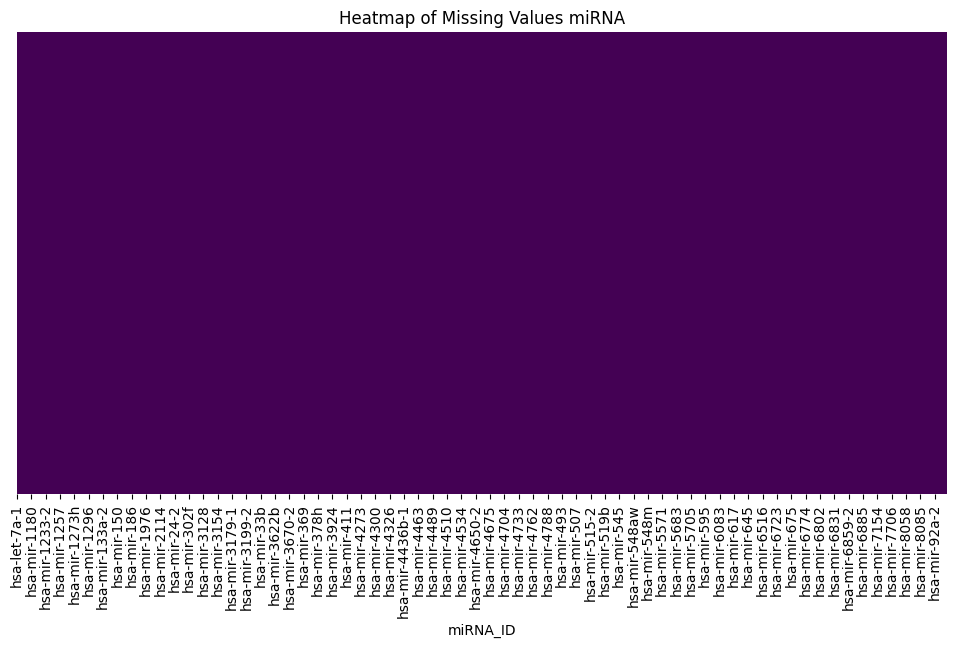

In [79]:
# Create a heatmap of NaN values
plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(df_mirna2.T.isna(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Heatmap of Missing Values miRNA")
plt.show()

In [80]:
df_mirna_meta.shape

(452, 30)

In [81]:
df_mirna2.shape

(1881, 904)

In [83]:
df_mirna_meta["sample_type"].head()

,sample_type
0,Metastatic
1,Metastatic
2,Metastatic
3,Primary Tumor
4,Primary Tumor


In [84]:
df_mirna_meta["sample_type"].value_counts()

,count
sample_type,
Metastatic,352
Primary Tumor,97
Solid Tissue Normal,2
Additional Metastatic,1
